In [0]:
#!mkdir datasets
#%cd datasets
#!wget https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/Dados/BloodPressure01.txt --no-check-certificate
#!wget https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/Dados/POP2006.csv --no-check-certificate
#!wget https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/Dados/CampeonatoBrasileiro2014.txt --no-check-certificate
#!wget https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/Dados/mtcars.csv --no-check-certificate
#%cd ..

Coleção: **BloodPressure01**

In [216]:
import pandas as pd

pressao = pd.read_csv('./datasets/BloodPressure01.txt', sep=",")
print(pressao.shape)
# 1:18 Seleciona apenas as 17 primeiras colunas, pois o python começa com index em 0
pressao = pressao.iloc[:, 0:18]
print(pressao.shape)
print(pressao.columns[0:18].values)

(500, 501)
(500, 18)
['sbp' 'gender' 'married' 'smoke' 'exercise' 'age' 'weight' 'height'
 'overwt' 'race' 'alcohol' 'trt' 'bmi' 'stress' 'salt' 'chldbear' 'income'
 'educatn']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff953aaada0>]],
      dtype=object)

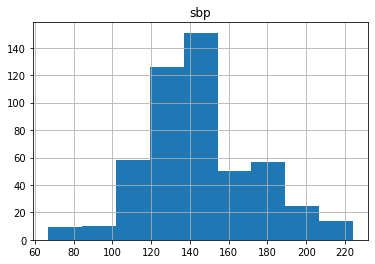

In [217]:
pressao.hist(column='sbp', bins =9)

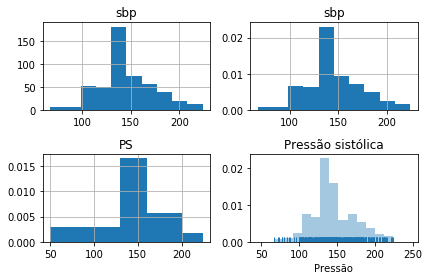

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
pressao.hist(column='sbp', ax=axes[0,0])

pressao.hist(column='sbp', density=True, ax=axes[0,1])

pressao.hist(column='sbp', 
             bins=[50, 130, 160, 200, 
                   max(pressao['sbp'])], 
             density=True, ax=axes[1,0],
             )
axes[1,0].set_title('PS')

sns.distplot(pressao['sbp'], bins=13, norm_hist=True, rug=True, ax=axes[1,1],
             kde_kws={"color": "w", "lw": 0},
             )
axes[1,1].set_title('Pressão sistólica')
axes[1,1].set_xlabel('Pressão')

plt.tight_layout()

Coleção: **POP2006**

In [0]:
import pandas as pd

pop = pd.read_csv('./datasets/POP2006.csv', encoding='latin-1')

In [220]:
pop.columns.values

array(['ESTADO', 'MUNICIPIO', 'POP2006'], dtype=object)

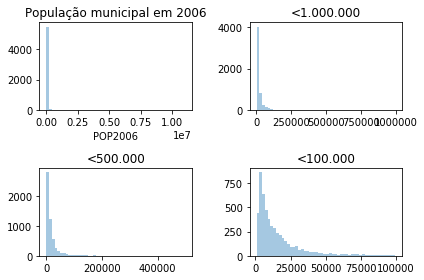

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
sns.distplot(pop['POP2006'], ax=axes[0,0], kde=False,
             kde_kws={"color": "w", "lw": 0},)
axes[0,0].set_title('População municipal em 2006')

sns.distplot([x for x in pop['POP2006'] if x < 1000000], ax=axes[0,1], kde=False,
             kde_kws={"color": "w", "lw": 0},)
axes[0,1].set_title('<1.000.000')

sns.distplot([x for x in pop['POP2006'] if x < 500000], ax=axes[1,0], kde=False,
             kde_kws={"color": "w", "lw": 0},)
axes[1,0].set_title('<500.000')

sns.distplot([x for x in pop['POP2006'] if x < 100000], ax=axes[1,1], kde=False,
             kde_kws={"color": "w", "lw": 0},)
axes[1,1].set_title('<100.000')

plt.tight_layout()

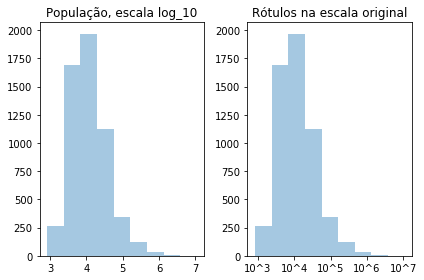

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt
from math import log

fig, axes = plt.subplots(nrows=1, ncols=2)
sns_plot = sns.distplot([log(x,10) for x in pop['POP2006']], ax=axes[0], kde=False,
             bins=9,
             kde_kws={"color": "w", "lw": 0},)
axes[0].set_title('População, escala log_10')

sns.distplot([log(x,10) for x in pop['POP2006']], ax=axes[1], kde=False,
             bins=9,
             kde_kws={"color": "w", "lw": 0},
             )
axes[1].set_title('Rótulos na escala original')
axes[1].set_xticklabels(['','10^3','10^4','10^5','10^6','10^7'])
plt.tight_layout()


Coleção: **Campeonto Brasileiro**

In [223]:
import pandas as pd

campeonatoPandas = pd.read_csv('./datasets/CampeonatoBrasileiro2014.txt', sep=',', engine='python')
print(campeonatoPandas.columns.values)
print(campeonatoPandas.shape)

['Time' '\tPts' '\tJogos' '\tVit' '\tEmp' '\tDer' '\tGols' '\tGolsSofr'
 '\tSaldoGols' '\tAprov']
(20, 10)


In [235]:
import sys
!{sys.executable} -m pip install stemgraphic
pass

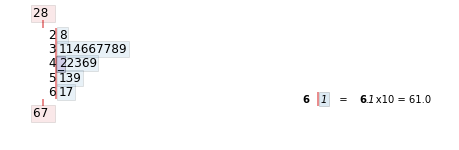

In [225]:
import stemgraphic 
data = campeonatoPandas['\tGols']
stemgraphic.stem_graphic(data, asc=False, aggregation=False, break_on=9)
pass

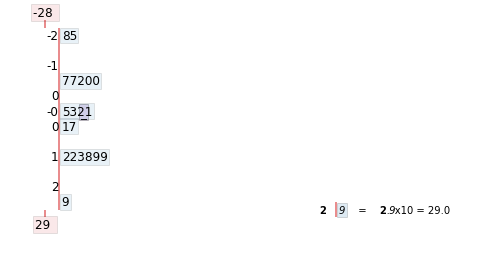

In [226]:
data = campeonatoPandas['\tSaldoGols']
stemgraphic.stem_graphic(data, asc=False, aggregation=False)
pass

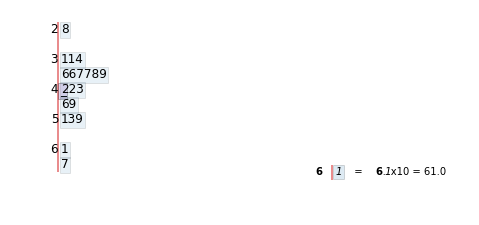

In [227]:
data = campeonatoPandas['\tGols']
stemgraphic.stem_graphic(data, asc=False, aggregation=False, break_on=5)
pass

Coleção: **BloodPressure01**

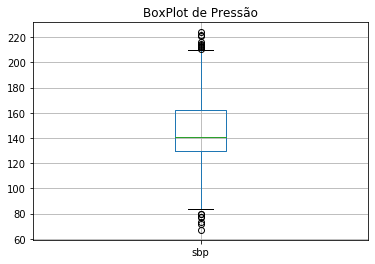

In [228]:
fig, axes = plt.subplots(nrows=1, ncols=1)
pressao.boxplot('sbp', ax=axes)
axes.set_title('BoxPlot de Pressão')
pass

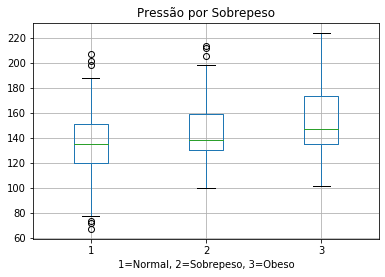

In [229]:
fig, axes = plt.subplots(nrows=1, ncols=1)
pressao.boxplot(['sbp'], ax=axes, by='overwt',)
axes.set_title('Pressão por Sobrepeso')
plt.suptitle('') 
axes.set(xlabel="1=Normal, 2=Sobrepeso, 3=Obeso")
pass

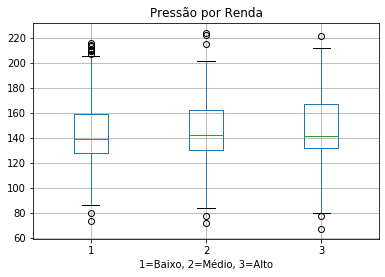

In [230]:
fig, axes = plt.subplots(nrows=1, ncols=1)
pressao.boxplot(['sbp'], ax=axes, by='income',)
axes.set_title('Pressão por Renda')
plt.suptitle('') 
axes.set(xlabel="1=Baixo, 2=Médio, 3=Alto")
pass

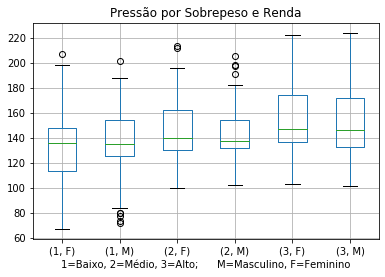

In [231]:
fig, axes = plt.subplots(nrows=1, ncols=1)
pressao.boxplot(['sbp'], ax=axes, by=['overwt', 'gender'],)
axes.set_title('Pressão por Sobrepeso e Renda')
plt.suptitle('') 
axes.set(xlabel="1=Baixo, 2=Médio, 3=Alto;      M=Masculino, F=Feminino")
pass

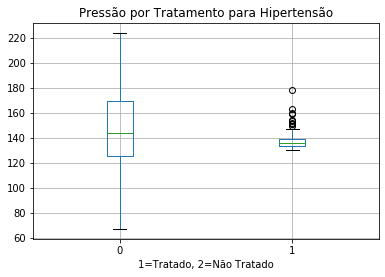

In [232]:
fig, axes = plt.subplots(nrows=1, ncols=1)
pressao.boxplot(['sbp'], ax=axes, by="trt",)
axes.set_title('Pressão por Tratamento para Hipertensão')
plt.suptitle('') 
axes.set(xlabel="1=Tratado, 2=Não Tratado")
pass

Coleção: **MTcars**

In [233]:
import pandas as pd

cars = pd.read_csv('./datasets/mtcars.csv')
cars.columns.values

array(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec',
       'vs', 'am', 'gear', 'carb'], dtype=object)

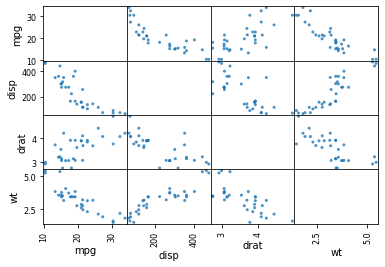

In [234]:
from pandas.plotting import scatter_matrix
scatter_matrix(cars[['mpg', 'disp', 'drat', 'wt']], alpha=0.8, diagonal='')
pass